In [3]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import pandas as pd

from diive.core.plotting.plotfuncs import default_format
from diive.pkgs.analyses.histogram import Histogram
from diive.core.io.files import load_parquet

# pd.options.display.width = None
# pd.options.display.max_columns = None
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [7]:
# Source folders parquet
SOURCEFILE = r"..\0_data\OPENLAG-IRGA-Level-0_fluxnet_2005-2024\merged_all_years.parquet"
df = load_parquet(filepath=SOURCEFILE)

Loaded .parquet file ..\0_data\OPENLAG-IRGA-Level-0_fluxnet_2005-2024\merged_all_years.parquet (0.538 seconds).
    --> Detected time resolution of <30 * Minutes> / 30min 


In [8]:
df

,AIR_CP,AIR_DENSITY,AIR_MV,AIR_RHO_CP,AOA_METHOD,AXES_ROTATION_METHOD,BADM_HEIGHTC,BADM_INSTPAIR_EASTWARD_SEP_GA_CH4,BADM_INSTPAIR_EASTWARD_SEP_GA_CO2,BADM_INSTPAIR_EASTWARD_SEP_GA_H2O,BADM_INSTPAIR_EASTWARD_SEP_GA_N2O,BADM_INSTPAIR_EASTWARD_SEP_GA_NONE,BADM_INSTPAIR_HEIGHT_SEP_GA_CH4,BADM_INSTPAIR_HEIGHT_SEP_GA_CO2,BADM_INSTPAIR_HEIGHT_SEP_GA_H2O,BADM_INSTPAIR_HEIGHT_SEP_GA_N2O,BADM_INSTPAIR_HEIGHT_SEP_GA_NONE,BADM_INSTPAIR_NORTHWARD_SEP_GA_CH4,BADM_INSTPAIR_NORTHWARD_SEP_GA_CO2,BADM_INSTPAIR_NORTHWARD_SEP_GA_H2O,BADM_INSTPAIR_NORTHWARD_SEP_GA_N2O,BADM_INSTPAIR_NORTHWARD_SEP_GA_NONE,BADM_INST_AVERAGING_INT,BADM_INST_GA_CP_TUBE_FLOW_RATE_GA_CH4,BADM_INST_GA_CP_TUBE_FLOW_RATE_GA_CO2,...,W_N2O_MEAS_COV,W_NONE_MEAS_COV,W_NUM_SPIKES,W_P25,W_P75,W_SIGMA,W_SKW,W_SPIKE_NREX,W_T_SONIC_COV,W_T_SONIC_COV_IBROM,W_T_SONIC_COV_IBROM_N0004,W_T_SONIC_COV_IBROM_N0008,W_T_SONIC_COV_IBROM_N0016,W_T_SONIC_COV_IBROM_N0032,W_T_SONIC_COV_IBROM_N0065,W_T_SONIC_COV_IBROM_N0133,W_T_SONIC_COV_IBROM_N0277,W_T_SONIC_COV_IBROM_N0614,W_T_SONIC_COV_IBROM_N1626,W_UNROT,W_U_COV,W_VM97_TEST,W_ZCD,ZL,ZL_UNCORR
TIMESTAMP_MIDDLE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-07-26 15:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-07-26 16:15:00,1005.85,1.10820,0.026137,1114.68,0.0,1.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,...,NaN,NaN,2.0,-0.102779,0.102941,0.174590,-0.032264,4.0,-0.003914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032976,-0.018731,800000001.0,101.0,0.040254,0.040012
2005-07-26 16:45:00,1005.85,1.10882,0.026122,1115.30,0.0,1.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,...,NaN,NaN,4.0,-0.114391,0.113579,0.194094,-0.059143,7.0,-0.006246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032289,-0.023372,800000000.0,65.0,0.045414,0.045130
2005-07-26 17:15:00,1005.84,1.10896,0.026119,1115.44,0.0,1.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,...,NaN,NaN,2.0,-0.132907,0.131552,0.215548,-0.005733,4.0,-0.008900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045077,-0.029726,800000001.0,32.0,0.046117,0.045808
2005-07-26 17:45:00,1005.85,1.10853,0.026129,1115.01,0.0,1.0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,...,NaN,NaN,0.0,-0.133468,0.127750,0.212234,0.153462,0.0,-0.003965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047853,-0.031755,800000000.0,27.0,0.018531,0.018420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 22:45:00,1004.41,1.25419,0.023084,1259.72,0.0,1.0,0.5,NaN,34.0,34.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,-6.7,-6.7,NaN,NaN,30.0,NaN,NaN,...,NaN,NaN,3.0,-0.111392,0.114492,0.190033,-0.176250,4.0,0.005537,0.005025,0.000763,0.001235,0.001807,0.002463,0.003140,0.003740,0.004241,0.004626,0.004886,0.042161,-0.018129,800000001.0,62.0,-0.065476,-0.067415
2024-12-31 23:15:00,1004.47,1.25527,0.023064,1260.88,0.0,1.0,0.5,NaN,34.0,34.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,-6.7,-6.7,NaN,NaN,30.0,NaN,NaN,...,NaN,NaN,0.0,-0.113588,0.119482,0.183822,-0.110979,0.0,0.006780,0.006917,0.001333,0.002168,0.003103,0.004044,0.004919,0.005626,0.006149,0.006531,0.006785,0.048551,-0.020766,800000000.0,98.0,-0.062634,-0.064302
2024-12-31 23:45:00,1004.53,1.25646,0.023042,1262.15,0.0,1.0,0.5,NaN,34.0,34.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,-6.7,-6.7,NaN,NaN,30.0,NaN,NaN,...,NaN,NaN,0.0,-0.124939,0.126689,0.204007,-0.169266,0.0,0.009057,0.008272,0.001705,0.002606,0.003697,0.004808,0.005782,0.006554,0.007178,0.007689,0.008067,0.049272,-0.031205,800000000.0,56.0,-0.047652,-0.048824


In [9]:
tlag_cols = [c for c in df.columns if "TLAG" in c]
tlag_cols

['CH4_TLAG_ACTUAL',
 'CH4_TLAG_MAX',
 'CH4_TLAG_MIN',
 'CH4_TLAG_NOMINAL',
 'CH4_TLAG_USED',
 'CO2_TLAG_ACTUAL',
 'CO2_TLAG_MAX',
 'CO2_TLAG_MIN',
 'CO2_TLAG_NOMINAL',
 'CO2_TLAG_USED',
 'H2O_TLAG_ACTUAL',
 'H2O_TLAG_MAX',
 'H2O_TLAG_MIN',
 'H2O_TLAG_NOMINAL',
 'H2O_TLAG_USED',
 'N2O_TLAG_ACTUAL',
 'N2O_TLAG_MAX',
 'N2O_TLAG_MIN',
 'N2O_TLAG_NOMINAL',
 'N2O_TLAG_USED',
 'NONE_TLAG_ACTUAL',
 'NONE_TLAG_MAX',
 'NONE_TLAG_MIN',
 'NONE_TLAG_NOMINAL',
 'NONE_TLAG_USED',
 'VM97_TLAG_HF',
 'VM97_TLAG_SF']

In [13]:
# # Check min lags CO2
# tlag_min_cols = [c for c in tlag_cols if c.endswith("_MIN")]
# tlag_min_cols = [c for c in tlag_cols if "CO2" in c]
# tlag_min = df[tlag_min_cols].copy()
# for c in tlag_min.columns:
#     tlag_min[c].plot(x_compat=True, title=c)
#     plt.show()

# # Check max lags
# tlag_max_cols = [c for c in tlag_cols if c.endswith("_MAX")]
# tlag_max_cols = [c for c in tlag_cols if "CO2" in c]
# tlag_max = df[tlag_max_cols].copy()
# for c in tlag_max.columns:
#     tlag_max[c].plot(x_compat=True, title=c)
#     plt.show()

In [41]:
tlag_actual_cols = [c for c in tlag_cols if c.endswith("_ACTUAL")]
# locs = (df.index.year == 2019) & (df.index.month >= 5)
locs = df.index.year == 2024
# locs = (df.index.year == 2017) | (df.index.year == 2018)
# locs = (df.index.year == 2017) & (df.index < "2017-03-15 23:59:00")
# locs = (df.index.year == 2019) & ((df.index > "2019-02-17 23:59:00") & (df.index <= "2019-04-30 23:59:00"))
# locs = (
#         ((df.index > "2019-01-01 23:59:00") & (df.index < "2019-02-18 07:00:00")) |
#         ((df.index > "2019-05-01 07:00:00") & (df.index < "2019-05-22 07:00:00"))
# )
# locs = (df.index > "2020-02-28 23:59:00") & (df.index < "2020-05-13 07:00:00")
# locs = (df.index > "2021-07-23 23:59:00")
tlag_actual = df[tlag_actual_cols][locs].copy()
first_date = tlag_actual.index[0].date()
last_date = tlag_actual.index[-1].date()

# for c in tlag_actual.columns:
#     tlag_actual[c].plot(x_compat=True, title=c)
#     plt.show()

# gases = ['CO2']
gases = ['CO2', 'H2O']
vline1 = 0.05
vline2 = 0.50
# gases = ['CH4', 'N2O']
# gases = ['CH4', 'N2O', 'H2O']
# vline1 = 0.4
# vline2 = 0.85
startbin = 0
endbin = 3

C:\Users\nopan\AppData\Local\Temp\ipykernel_13868\3563623386.py:63: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  ax2.locator_params(axis='both', nbins=20)
C:\Users\nopan\AppData\Local\Temp\ipykernel_13868\3563623386.py:67: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\nopan\AppData\Local\Temp\ipykernel_13868\3563623386.py:63: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  ax2.locator_params(axis='both', nbins=20)
C:\Users\nopan\AppData\Local\Temp\ipykernel_13868\3563623386.py:67: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


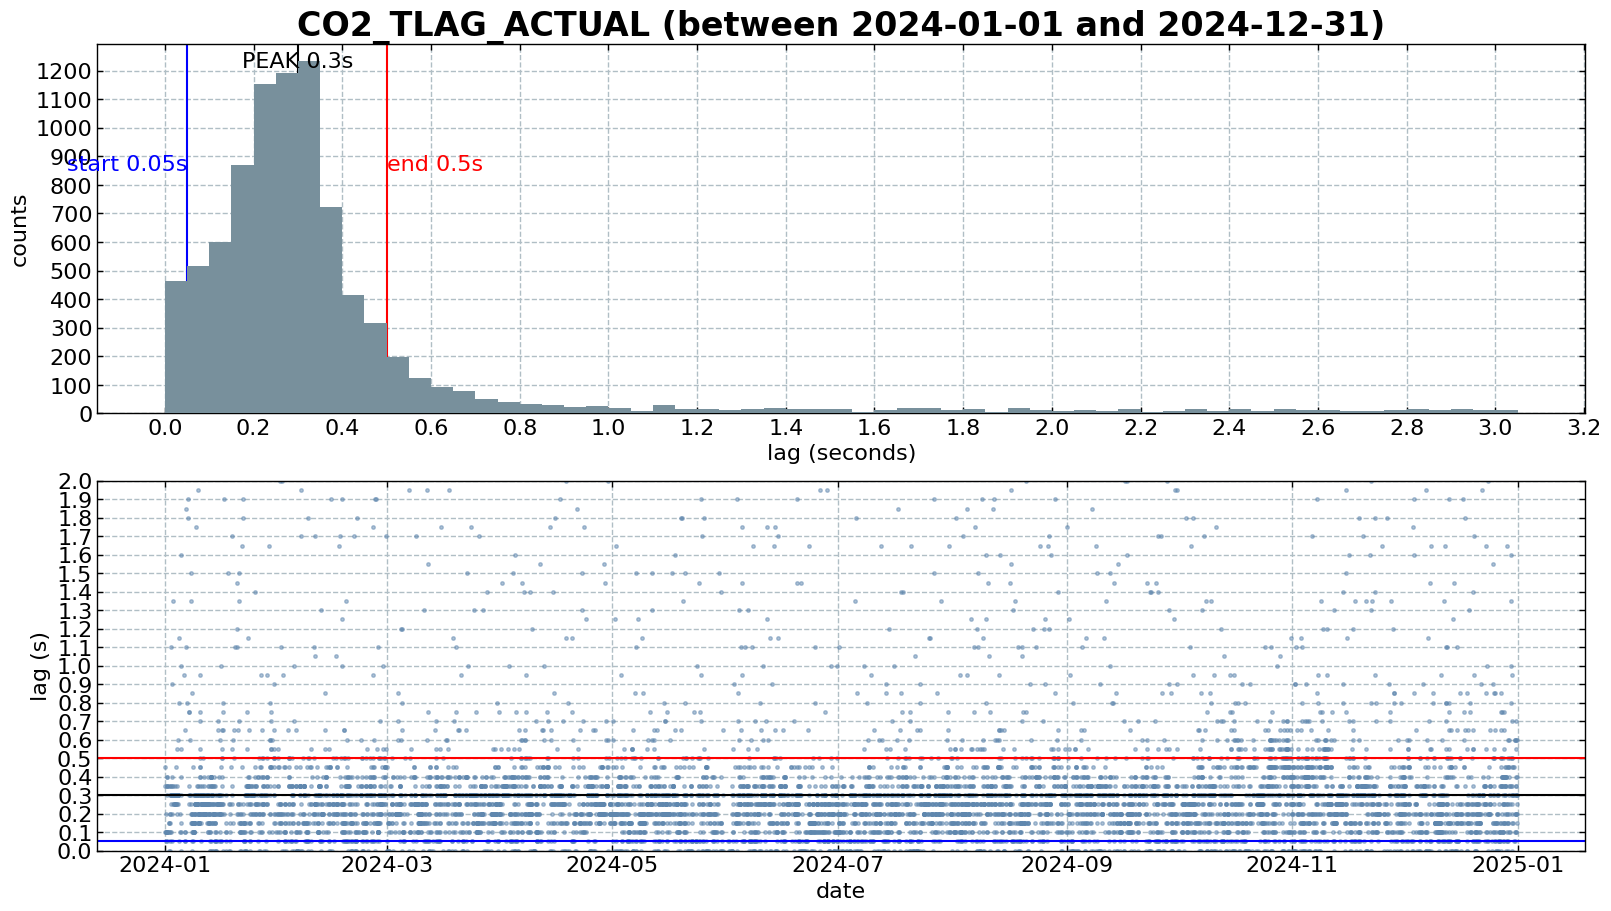

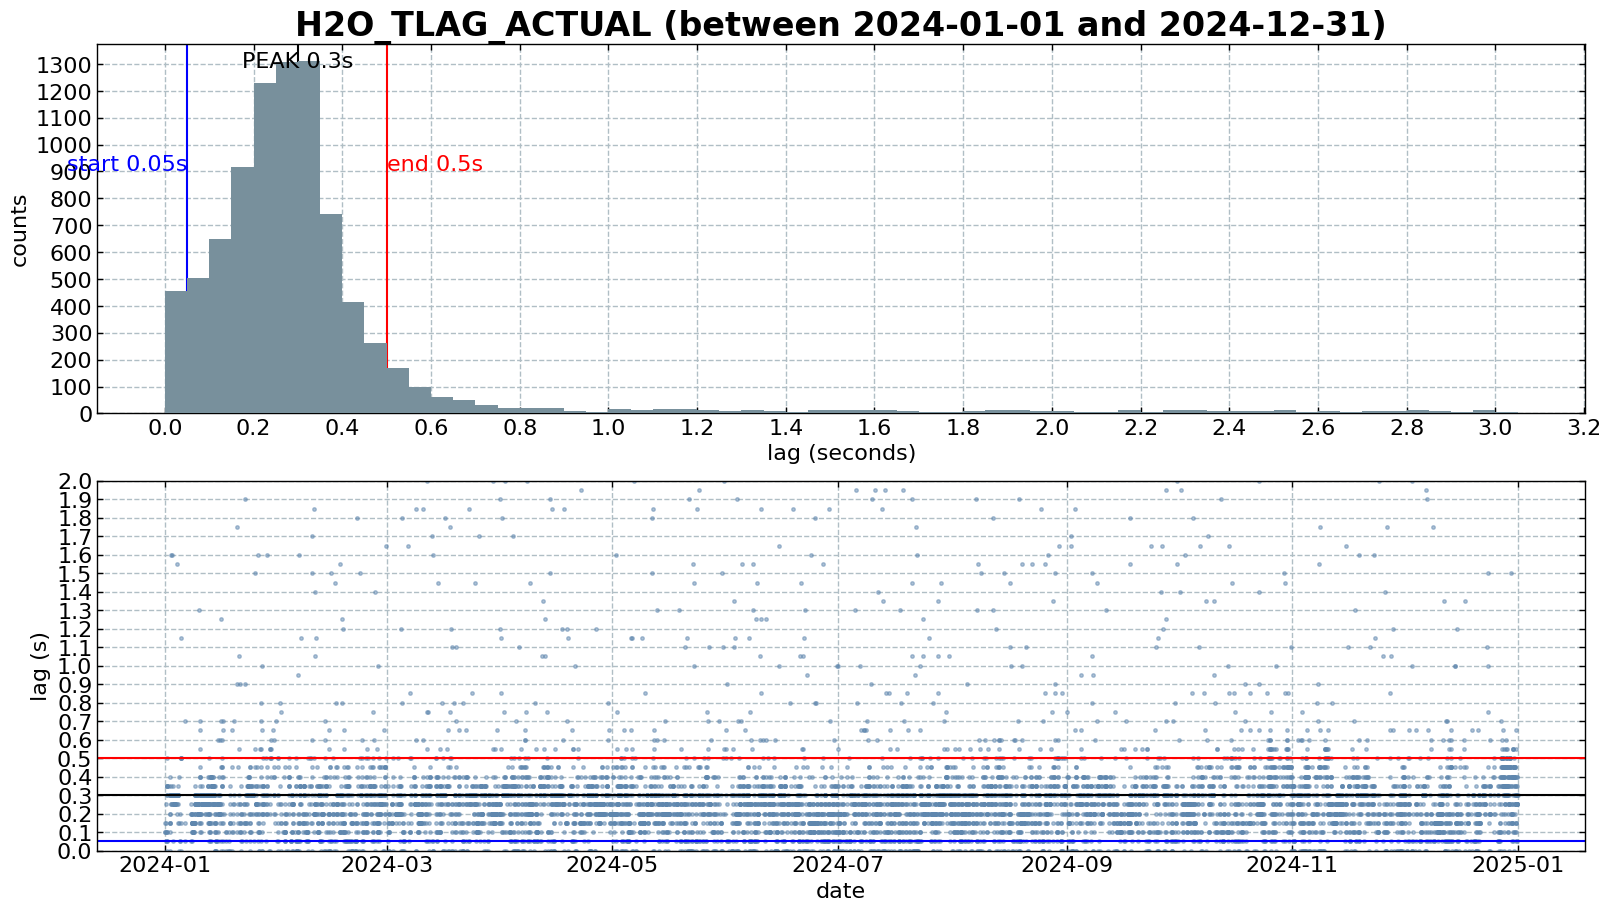

In [42]:
for gas in gases:
    gascol = f'{gas}_TLAG_ACTUAL'
    series = tlag_actual[gascol].copy()

    hist = Histogram(
        s=series,
        method='uniques',
        # n_bins=10,
        # ignore_fringe_bins=None
        ignore_fringe_bins=[5, 10]
    )

    results = hist.results
    peakbins = hist.peakbins

    locs = (results['BIN_START_INCL'] >= startbin) & (results['BIN_START_INCL'] <= endbin)
    results = results[locs].copy()

    gs = gridspec.GridSpec(1, 1)  # rows, cols
    gs.update(wspace=0.3, hspace=0.3, left=0.03, right=0.97, top=0.97, bottom=0.03)

    fig = plt.figure(layout="constrained", facecolor='white', figsize=(16, 9))
    gs = gridspec.GridSpec(2, 1, figure=fig)  # rows, cols
    ax = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1, :])

    hist_bins = results['BIN_START_INCL'].copy()
    hist_counts = results['COUNTS'].copy()
    bar_width = .05
    # bar_width = (hist_bins[1] - hist_bins[0]) * 1  # Calculate bar width
    args = dict(width=bar_width, align='edge')
    ax.bar(x=hist_bins, height=hist_counts, label='counts', zorder=90, color='#78909c', **args)
    # ax.set_xlim(hist_bins[0], hist_bins[-1])

    ax2.plot(series.index, series, alpha=0.5, c='#5f87ae', marker='.', ms=5, ls='none')

    title = f"{gascol} (between {first_date} and {last_date})"
    ax.set_title(title, fontsize=24, weight='bold')

    ax.axvline(vline1, color="blue")
    ax.axvline(vline2, color="red")
    ax2.axhline(vline1, color="blue")
    ax2.axhline(vline2, color="red")
    peak = peakbins[0]
    ax2.axhline(peak, color="black")

    trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
    ax.text(vline1, 0.70, f"start {vline1}s",
            size=16, color='blue', backgroundcolor='none', transform=trans,
            alpha=1, horizontalalignment='right', verticalalignment='top', zorder=999)
    ax.text(vline2, 0.70, f"end {vline2}s",
            size=16, color='red', backgroundcolor='none', transform=trans,
            alpha=1, horizontalalignment='left', verticalalignment='top', zorder=999)

    ax.axvline(peak, color="black")
    ax.text(peak, 0.98, f"PEAK {peak}s",
            size=16, color='black', backgroundcolor='none', transform=trans,
            alpha=1, horizontalalignment='center', verticalalignment='top', zorder=999)

    default_format(ax=ax, ax_xlabel_txt="lag (seconds)", ax_ylabel_txt="counts")
    default_format(ax=ax2, ax_xlabel_txt="date", ax_ylabel_txt="lag (s)")
    ax.locator_params(axis='both', nbins=20)
    ax2.locator_params(axis='both', nbins=20)

    ax2.set_ylim([0, 2])

    fig.show()
